# 아스키 코드, 유니코드, UTF-8 그리고 Python

[Reference]
- [블로그] : [URL](https://whatisthenext.tistory.com/103)
- [서적] "파이선 알고리즘 인터뷰(박상길)"

### 기본적인 배경지식


1. 컴퓨터의 기본 저장 단위 : Byte

2. 1 byte = 8 bit = $2^{8}$(256)개의 값 저장 가능

3. 문자 / 기호 집합을 컴퓨터에서 표현하려면 부호(code)로 바꿔야 하는 데, 이를 'encoding'이라 한다.
    - ex) 모스부호

4. 이러한 encoding 방식에 ASCII, UNICODE, UTF-8 등이 있다.

### 1) ASCII (American Standard Code for Information Interchange)


- **(8-1 = 7)비트**로 문자/부호 표현
- 8비트 중 1비트는 통신에러 검출을 위한 'parity bit'로 사용되어, 실질적인 정보는 7비트에 담아 표현한다.
- 즉, 1byte에는 $2^{8}$개가 아닌 $2^{7}$개(128)의 정보를 담을 수 있다.

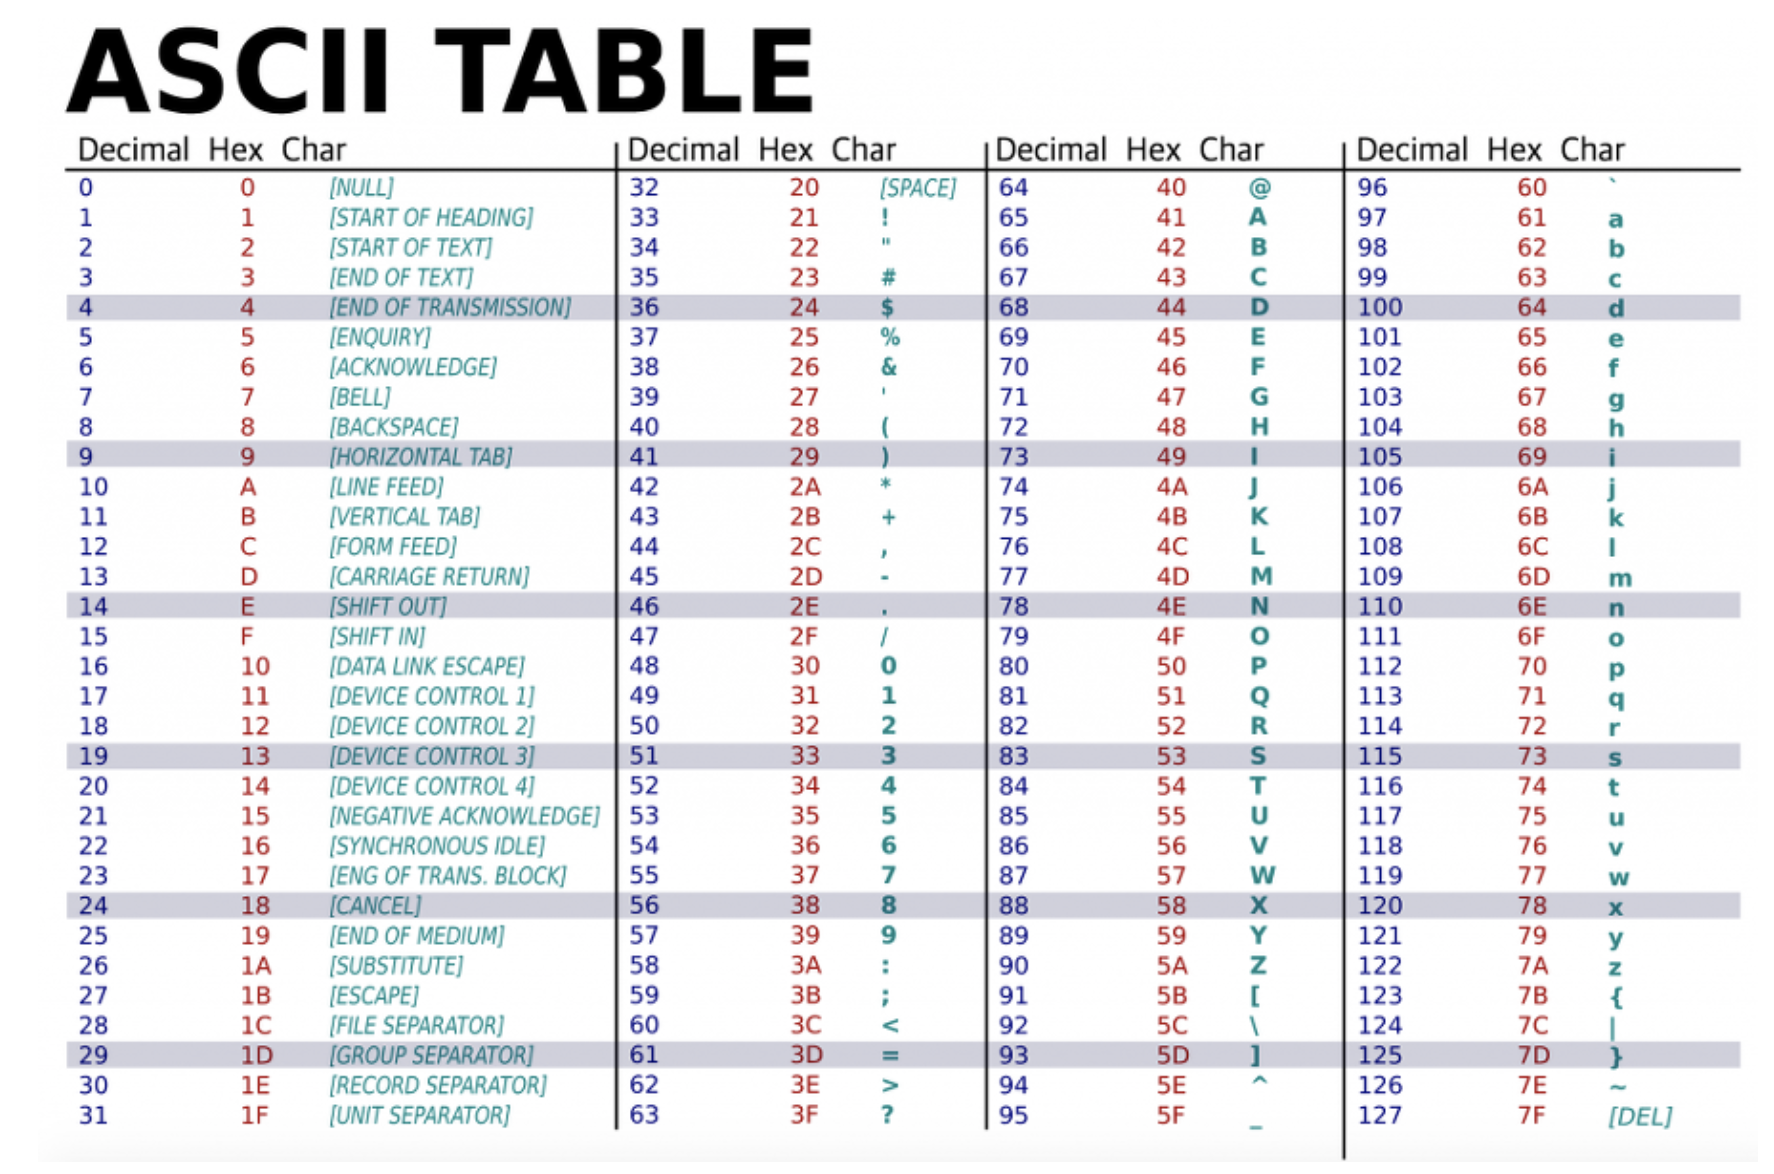

In [2]:
from IPython.display import Image
Image('/Users/kimjeongseob/Desktop/Study/1.Study/2. with computer/4.Programming/1.Algorithms/3.Algorithms_study/0. 기타 정리("파이썬 알고리즘 인터뷰(박상길)")/참고자료/ASCII.png')

[출처] : [URL](https://whatisthenext.tistory.com/103)

**한계** : $2^{7}$로는 영어 외 다른 언어 문자를 표현하기에 어려움

- 전세계 언어 문자를 모두 담을 수 있는 통일된 인코딩 체계로 만들어진 것이 'UNICODE'

### 2) UNICODE

- 한글 : 자음(21개) + 모음(19개) 조합만 해도 128개를 초과(단순 조합 수 계산 시, $_{40}C_2$ 개의 조합이 가능)
- 중국어 : 한자의 갯수는 128개를 초과
    - 따라서, ASCII코드(1byte 단위)로는 한글, 중국어 문자를 담아낼 수 없다
    
- **UNICODE** : 1byte(8bit) -> 2 ~ 4byte(16~32bit)로 **저장공간을 넓혀** 문자를 할당한다.

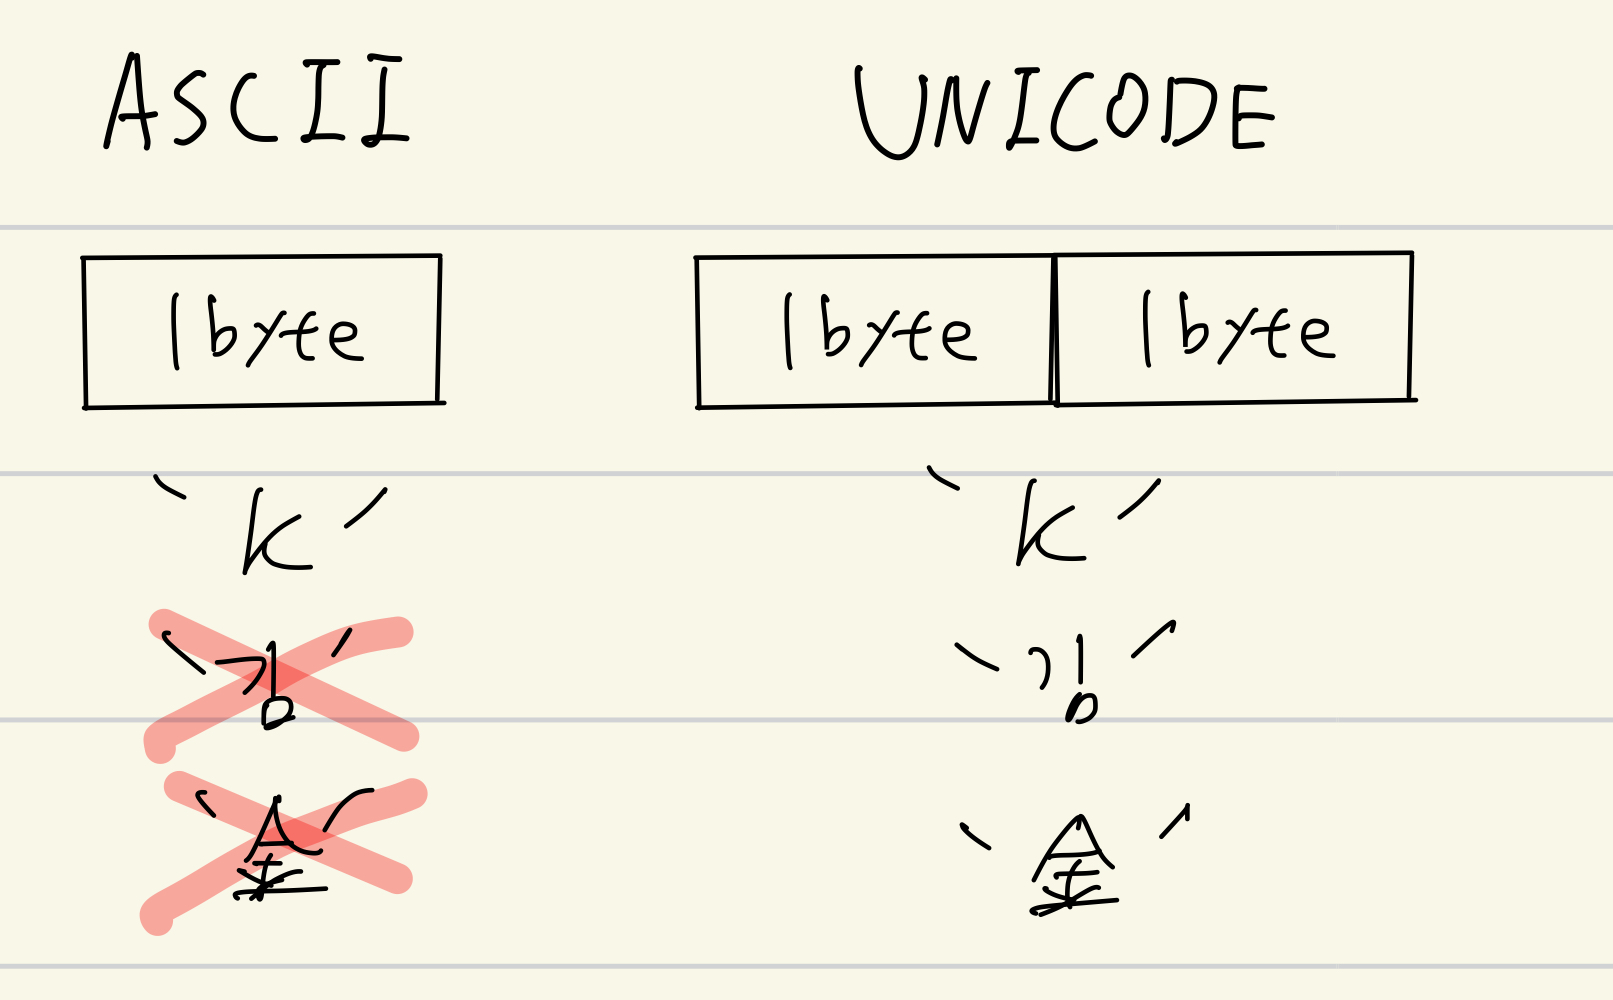

In [3]:
Image('/Users/kimjeongseob/Desktop/Study/1.Study/2. with computer/4.Programming/1.Algorithms/3.Algorithms_study/0. 기타 정리("파이썬 알고리즘 인터뷰(박상길)")/참고자료/ASCII vs UNICODE.jpeg')

**한계** : 유니코드는 공간이 '고정길이'를 갖는 **'고정길이 인코딩'**이다.
따라서, **공간 효율성이 낮다.**

    ex) 영문은 ASCII 문자 체계에 해당해, 예전과 같이 1 byte에 담을 수 있지만 UNICODE에 따르면 무조건 2byte를 할당해야 하는 것이다.
    
고정길이 인코딩에서 벗어나 **가변길이 인코딩**으로 공간 효율성을 높인 인코딩 방식이 **'UTF-8'**이다.

### 3) UTF-8

- 유니코드 값에 따라 **가변적으로** 할당할 Byte 크기를 결정해 인코딩하는 방식 (8bit 단위로 결정하기 때문에 'UTF-8'이다. UTF-16도 있음)

ex)
    - 'A'의 유니코드 값 <= 1byte
        따라서, 1 byte로 인코딩
    
    - $\pi$의 유니코드 값 ( 1byte <=  <= 2byte )
        따라서, 2 byte로 인코딩
        
    - '한'의 유니코드 값 ( 2byte <=  <= 3byte )
        따라서, 3 byte로 인코딩

### 4) Python

```

그렇다면, 파이썬에서는 문자열 표현 시, UTF-8을 사용할까?

그렇지 않다. 그 이유는 파이썬의 '인덱스' 기능 때문이다.

파이썬은 문자열 슬라이싱을 비롯해 원하는 문자에 인덱스로 접근할 수 있는 다양한 방법을 제공한다.
만약, 문자열을 UTF-8로 인코딩해둔다면, 각 문자마다 바이트 길이가 달라지게 되므로
전체 문자열을 스캔하지 않는 한 원하는 인덱스에 빠르게 접근할 수 없다.

따라서, 고정길이 인코딩 방식이 필요하며, 파이썬은 문자열 단위로 다른 고정길이 인코딩 방식을 적용해 이 문제를 해결한다.

ASCII범위 내 문자는 1 Byte
이외 대부분 문자는 2 Byte
그 외 특수한 문자는 4 Byte

Python은 위처럼 문자마다 다른 '고정길이 인코딩'을 적용해
인덱스 접근을 통한 '시간 효율성'을 높이는 방식을 따르고 있다.

```